# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [38]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [39]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return x**2 * numpy.sin(x);

Ensure your function works with numpy arrays:

In [40]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [41]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2 * x * numpy.sin(x) + (2 - x**2)*numpy.cos(x) - 2;

Check your solution with the same numpy array:

In [42]:
assert g(0) == 0.

In [43]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [44]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin);

Check your analytic function:

In [45]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [46]:
def integrate_numeric(xmin, xmax, N):
    panel = (xmax - xmin) / N
    
    x = xmin
    Seq = 0

    for i in range (0,N):
        Mid = x + ( panel / 2)
        Seq += 4 * f(Mid) + 2 * f(x)
        x += panel
        
    x += panel * xmin
        
    return (panel / 6) * (f(xmin) + f(xmax) + Seq);

Make sure you have implemented Simpson's rule correctly:

In [47]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [48]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


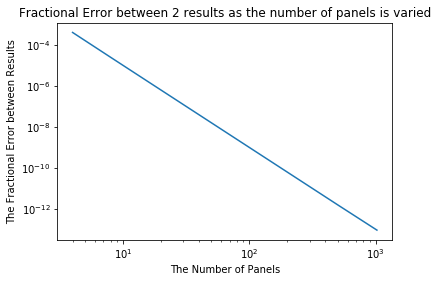

In [50]:
import pylab, math, matplotlib.pyplot as plt

x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
ans = [abs(integrate_numeric(x0,x1,4)-result_analytic),abs(integrate_numeric(x0,x1,8)-result_analytic),abs(integrate_numeric(x0,x1,16)-result_analytic),abs(integrate_numeric(x0,x1,32)-result_analytic),abs(integrate_numeric(x0,x1,64)-result_analytic),abs(integrate_numeric(x0,x1,128)-result_analytic),abs(integrate_numeric(x0,x1,256)-result_analytic),abs(integrate_numeric(x0,x1,512)-result_analytic),abs(integrate_numeric(x0,x1,1024)-result_analytic)]
          
plt.loglog(panel_counts, ans)

plt.title('Fractional Error between 2 results as the number of panels is varied')
plt.xlabel('The Number of Panels')
plt.ylabel('The Fractional Error between Results')
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

In general, the greater the number of panels used, the smaller the error is. However when N approaches between 10^5 and 10^6, the numerical error starts to increase again for most numerical methods. For high order approximations, when the function being integrated is not of high order itself, the error can be less optimal.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The greater the panel count, the lesser the error. However between 10^5 and 10^6 the error begins to increase again, resulting in a less accurate result.